In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_boston

In [7]:
df=load_boston()

In [10]:
data=pd.DataFrame(df.data)

In [11]:
data.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [14]:
data.columns=df.feature_names

In [15]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [16]:
data["price"]=df.target

In [17]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [19]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [24]:
model=LinearRegression()

In [28]:
mse=cross_val_score(model,x,y,scoring="neg_mean_squared_error",cv=5)
mean_mse=np.mean(mse)
print(mean_mse)

-37.13180746769914


In [35]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [39]:
Ridgere=Ridge()
params={"alpha":[1e-15,1e-14,1e-10,1e-5,1e-1,1,5,10,15,20,30,40,50,100]}
ridgereg=GridSearchCV(Ridgere,params,scoring="neg_mean_squared_error",cv=5)
ridgereg.fit(x,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-14, 1e-10, 1e-05, 0.1, 1, 5, 10,
                                   15, 20, 30, 40, 50, 100]},
             scoring='neg_mean_squared_error')

In [41]:
print(ridgereg.best_params_)
print(ridgereg.best_score_)

{'alpha': 100}
-29.905701947540404


In [44]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
params={"alpha":[1e-15,1e-14,1e-10,1e-5,1e-1,1,5,10,15,20,30,40,50,100]}
lassoreg=GridSearchCV(lasso,params,scoring="neg_mean_squared_error",cv=5)
lassoreg.fit(x,y)
print(lassoreg.best_params_)
print(lassoreg.best_score_)

c:\users\jagad\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4633.382878207054, tolerance: 3.919148542079209
  model = cd_fast.enet_coordinate_descent(
c:\users\jagad\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3763.7513265314064, tolerance: 3.3071316790123473
  model = cd_fast.enet_coordinate_descent(
c:\users\jagad\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4209.722674195946, tolerance: 2.813643886419753
  model = cd_fast.enet_coordinate_descent(
c:\users\jagad\appda

{'alpha': 0.1}
-34.83043231820267


In [45]:
from sklearn.model_selection import train_test_split

In [52]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=7)

In [59]:
prediction_lasso=lassoreg.predict(xtest)
prediction_ridge=ridgereg.predict(xtest)

c:\users\jagad\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

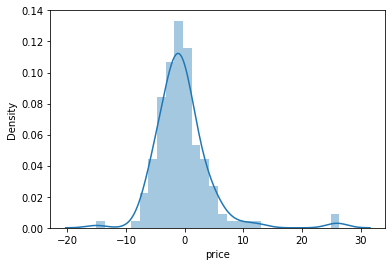

In [60]:
sns.distplot(ytest-prediction_lasso)

c:\users\jagad\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

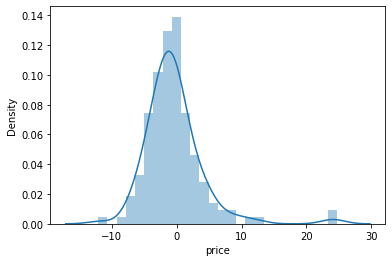

In [61]:
sns.distplot(ytest-prediction_ridge)